<a href="https://colab.research.google.com/github/ARJUNCO333/NLP-project/blob/main/NLP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/train.txt",encoding="ISO-8859-1",header=None,sep=";")
df.columns=["text","emotions"]
df

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [4]:
df.head()

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df.tail()

,text,emotions
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      16000 non-null  object
 1   emotions  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [7]:
df.isna().sum()

text        0
emotions    0
dtype: int64

In [8]:
df["emotions"].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotions, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

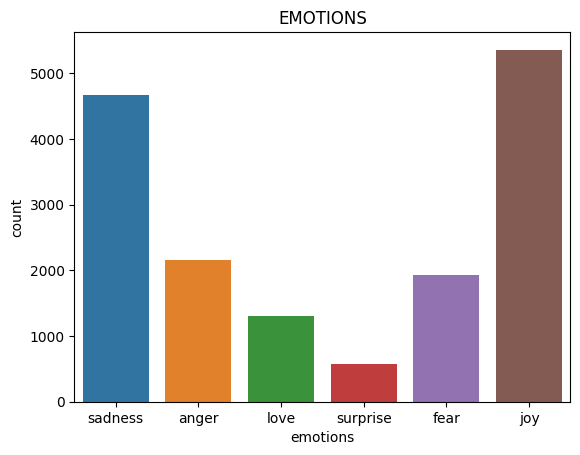

In [9]:
sns.countplot(x="emotions",data=df)
plt.title("EMOTIONS")
plt.show

In [11]:
df["emotions"]=df["emotions"].map({"sadness":1,"anger":2,"love":3,"surprise":4,"fear":5,"joy":6})
df

,text,emotions
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,2
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,2
...,...,...
15995,i just had a very brief time in the beanbag an...,1
15996,i am now turning and i feel pathetic that i am...,1
15997,i feel strong and good overall,6
15998,i feel like this was such a rude comment and i...,2


In [12]:
tweets=df["text"]
tweets

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

In [13]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

In [15]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

In [16]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets


0                                    didnt feel humiliated
1        can from feeling hopeless damned hopeful just ...
2                   grabbing minute post feel greedy wrong
3        ever feeling nostalgic about the fireplace wil...
4                                          feeling grouchy
                               ...                        
15995    just had very brief time the beanbag and said ...
15996    now turning and feel pathetic that still waiti...
15997                         feel strong and good overall
15998    feel like this was such rude comment and glad ...
15999     know lot but feel stupid because can not portray
Name: text, Length: 16000, dtype: object

In [17]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0                                        didnt feel humili
1        can from feel hopeless damn hope just from be ...
2                        grab minut post feel greedi wrong
3        ever feel nostalg about the fireplac will know...
4                                             feel grouchi
                               ...                        
15995    just had veri brief time the beanbag and said ...
15996    now turn and feel pathet that still wait tabl ...
15997                          feel strong and good overal
15998    feel like this was such rude comment and glad ...
15999      know lot but feel stupid becaus can not portray
Name: text, Length: 16000, dtype: object

In [18]:
from nltk.corpus import stopwords
stop=stopwords.words("english")
tweets=tweets.apply(lambda x:[ i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0                                        didnt feel humili
1          feel hopeless damn hope around someon care awak
2                        grab minut post feel greedi wrong
3           ever feel nostalg fireplac know still properti
4                                             feel grouchi
                               ...                        
15995    veri brief time beanbag said anna feel like be...
15996     turn feel pathet still wait tabl sub teach degre
15997                              feel strong good overal
15998                          feel like rude comment glad
15999                  know lot feel stupid becaus portray
Name: text, Length: 16000, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
train_data=vector.fit_transform(tweets)


In [20]:
train_data.shape

(16000, 10036)

In [21]:
x=train_data
y=df["emotions"].values
y

array([1, 1, 2, ..., 6, 2, 1])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(11200, 10036) (4800, 10036) (11200,) (4800,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [24]:
model1=KNeighborsClassifier(n_neighbors=5)
model2=SVC()
model3=MultinomialNB()
model4=DecisionTreeClassifier()
model5=RandomForestClassifier()
ls_model=[model1,model2,model3,model4,model5]


KNeighborsClassifier()
**********************************************************************
              precision    recall  f1-score   support

           1       0.73      0.87      0.79      1434
           2       0.73      0.70      0.71       607
           3       0.67      0.50      0.58       434
           4       0.63      0.48      0.54       178
           5       0.78      0.61      0.69       566
           6       0.79      0.79      0.79      1581

    accuracy                           0.74      4800
   macro avg       0.72      0.66      0.68      4800
weighted avg       0.74      0.74      0.74      4800

**********************************************************************
**********************************************************************
SVC()
**********************************************************************
              precision    recall  f1-score   support

           1       0.85      0.90      0.88      1434
           2       0.85      0.70  

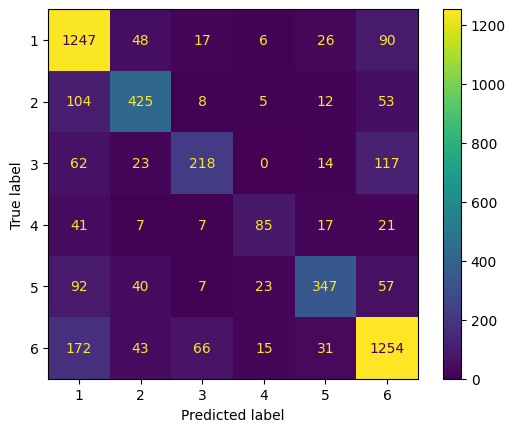

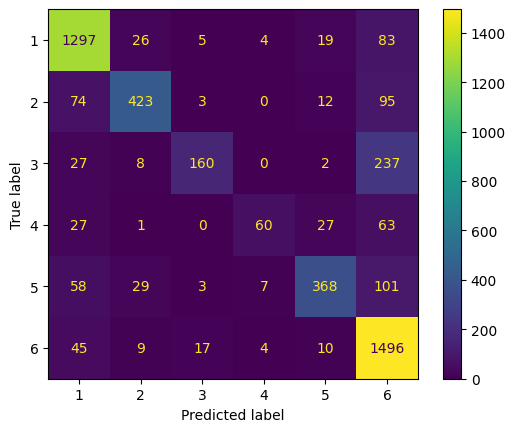

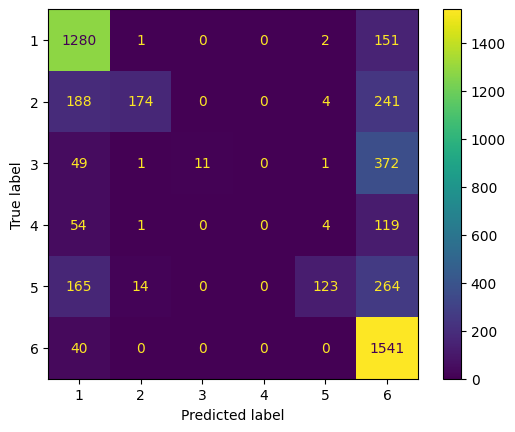

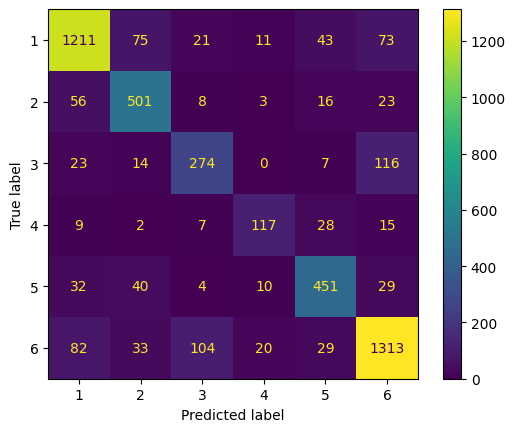

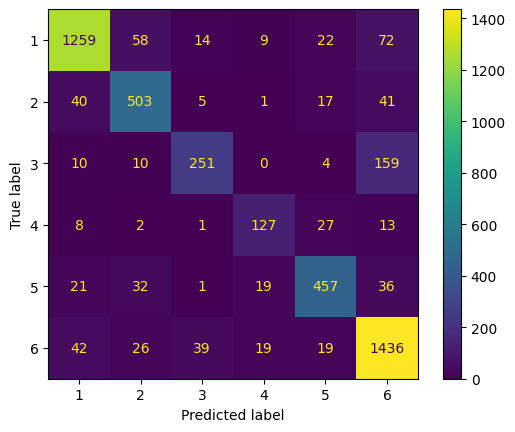

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
accuracy_df=pd.DataFrame(columns=["model","accuracy"])

for i in ls_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  accuracy_df=accuracy_df.append({"model":str(i),"accuracy":accuracy},ignore_index=True)

  print("**********************************************************************")
  print(classification_report(y_test,y_pred))
  print("**********************************************************************")
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("**********************************************************************")


In [27]:
accuracy_df["accuracy"]=accuracy_df["accuracy"]*100
accuracy_df

,model,accuracy
0,KNeighborsClassifier(),74.500000
1,SVC(),79.250000
2,MultinomialNB(),65.187500
3,DecisionTreeClassifier(),80.562500
4,RandomForestClassifier(),84.020833


In [32]:
accuracy_df.sort_values(by="accuracy",ascending=False)


,model,accuracy
4,RandomForestClassifier(),84.020833
3,DecisionTreeClassifier(),80.562500
1,SVC(),79.250000
0,KNeighborsClassifier(),74.500000
2,MultinomialNB(),65.187500


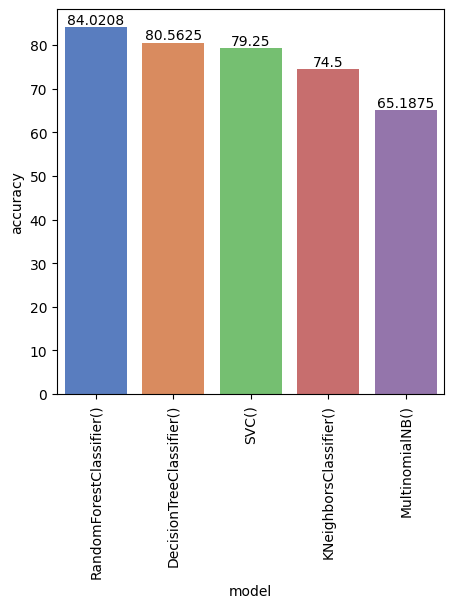

In [34]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
ax=sns.barplot(x="model",y="accuracy",palette="muted",
               data=accuracy_df.sort_values(by="accuracy",ascending=False),errwidth=0)
for i in ax.containers:
  ax.bar_label(i,)